# 아이리스 품종 예측
## 다준분류 문제 해결하기

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as pl
import numpy as np

# seed 값 설정
np.random.seed(3)
tf.random.set_seed(3)

# 데이터 입력
ds = pd.read_csv('./dataset/iris.csv', names=['Sepal_length', 'Speal_width', 'Petal_length', 'Petal_width', 'Class'])
print(ds.head())                      
print(ds.info())
print(ds.describe())

   Sepal_length  Speal_width  Petal_length  Petal_width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_length  150 non-null    float64
 1   Speal_width   150 non-null    float64
 2   Petal_length  150 non-null    float64
 3   Petal_width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       Sepal_length  Speal_width  Petal_length  Petal_width
count    150.000000   150.000000    150.000000   150.000000
mean

<AxesSubplot:>

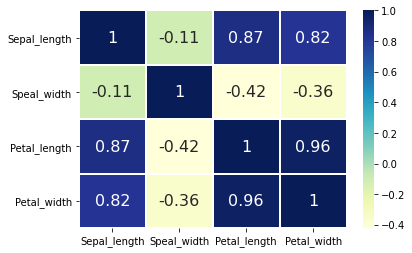

In [2]:
# 그래프 표시
sbn.heatmap(ds.corr(), linewidths='1', cmap="YlGnBu", annot=True, annot_kws={"size":16})

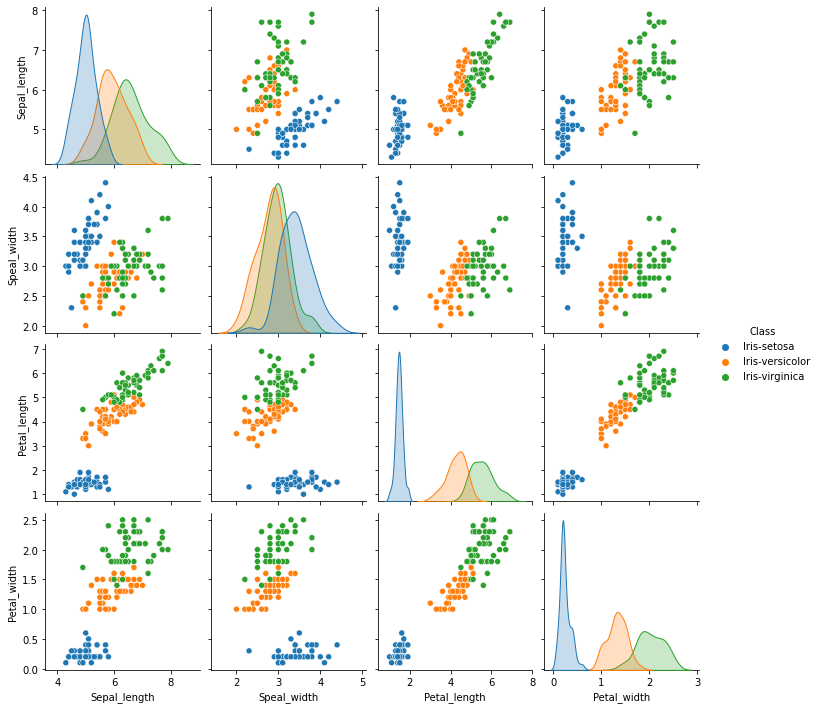

In [3]:
# 그래프로 확인
sbn.pairplot(ds, hue='Class')
pl.show()


In [4]:
# 데이터 분류
datavalues = ds.values
x = datavalues[:,0:4].astype(float)
y_obj = datavalues[:,4]

# 문자열로 숫자로 변환
e = LabelEncoder()
e.fit(y_obj)
y = e.transform(y_obj)
y_encoded = tf.keras.utils.to_categorical(y)

In [5]:
# 모델의 설정
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [6]:
# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
model.fit(x, y_encoded, epochs=50, batch_size=1)

Train on 150 samples
Epoch 1/50
150/150 [==============================] - 1s 7ms/sample - loss: 1.3262 - accuracy: 0.3333
Epoch 2/50
150/150 [==============================] - 0s 2ms/sample - loss: 0.8467 - accuracy: 0.5933
Epoch 3/50
150/150 [==============================] - 0s 2ms/sample - loss: 0.7125 - accuracy: 0.6800
Epoch 4/50
150/150 [==============================] - 0s 2ms/sample - loss: 0.6236 - accuracy: 0.7867
Epoch 5/50
150/150 [==============================] - 0s 2ms/sample - loss: 0.5535 - accuracy: 0.8533
Epoch 6/50
150/150 [==============================] - 0s 2ms/sample - loss: 0.4985 - accuracy: 0.8667
Epoch 7/50
150/150 [==============================] - 0s 2ms/sample - loss: 0.4583 - accuracy: 0.9133
Epoch 8/50
150/150 [==============================] - 0s 2ms/sample - loss: 0.4272 - accuracy: 0.9400
Epoch 9/50
150/150 [==============================] - 0s 2ms/sample - loss: 0.4006 - accuracy: 0.9200
Epoch 10/50
150/150 [==============================] - 0s 2ms

In [7]:
# 결과 출력
print("\n Accuracy : %.4f"%(model.evaluate(x, y_encoded)[1]))

150/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================